# Reading the signals etc

In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.integrate import simps
from scipy.fft import fftshift
from tsfel.feature_extraction import features as tsfelf
import gpxpy 
import gpxpy.gpx 

In [2]:
from os import listdir
from os.path import isfile, join


In [3]:
def bpf(arr, fs, lf, hf, order):
    wbut = [lf, hf]
    bbut, abut = signal.butter(order, wbut, btype ='bandpass', fs = fs)

    return signal.filtfilt(bbut, abut, arr)

def hpf(arr, fs, lf, order):
    wbut = lf
    bbut, abut = signal.butter(order, wbut, btype ='highpass', fs =fs)

    return signal.filtfilt(bbut, abut, arr)


In [81]:
mypath = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\10_Nov_2021_timestamps'
timestamps = [f for f in listdir(mypath) if isfile(join(mypath, f))]


In [82]:
mypath = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\10_Nov_2021_gravel_and_wet_asphalt'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]


In [83]:
mypath = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\22_Nov_2021_timestamps'
timestamps2 = [f for f in listdir(mypath) if isfile(join(mypath, f))]


In [84]:
mypath = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\timestamps_13_1_2022'
timestamps3 = [f for f in listdir(mypath) if isfile(join(mypath, f))]

timestamps3

['start_13_01_2022_14_44_07_wet_asphalt.csv',
 'start_13_01_2022_14_51_06_ice.csv',
 'start_13_01_2022_14_56_08_ice.csv',
 'start_13_01_2022_14_57_06_ice.csv',
 'start_13_01_2022_14_57_41_ice.csv',
 'start_13_01_2022_14_58_54_ice.csv',
 'start_13_01_2022_15_00_08_ice.csv',
 'start_13_01_2022_15_00_39_wet_asphalt.csv',
 'stop_13_01_2022_14_49_27_wet_asphalt.csv',
 'stop_13_01_2022_14_51_43_ice.csv',
 'stop_13_01_2022_14_56_31_ice.csv',
 'stop_13_01_2022_14_57_37_ice.csv',
 'stop_13_01_2022_14_57_43_ice.csv',
 'stop_13_01_2022_14_59_41_ice.csv',
 'stop_13_01_2022_15_00_15_ice.csv',
 'stop_13_01_2022_15_04_05_wet_asphalt.csv']

In [4]:

ice1_start = int('14_57_49')
ice1_stop = int('15_00_14')

ice2_start = int('14_52_32')
ice2_stop = int('14_56_25')

wasp1_start = int('15_00_35')
wasp1_stop = int('15_01_35')

wasp2_start = int('14_47_32')
wasp2_stop = int('14_49_25')




In [5]:
mypath = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\13.01.2022'
onlyfiles3 = [f for f in listdir(mypath) if isfile(join(mypath, f))]

onlyfiles3

['2022_14_37_37-Jan-13.wav',
 '2022_14_37_47-Jan-13.wav',
 '2022_14_37_57-Jan-13.wav',
 '2022_14_38_07-Jan-13.wav',
 '2022_14_38_17-Jan-13.wav',
 '2022_14_38_28-Jan-13.wav',
 '2022_14_38_38-Jan-13.wav',
 '2022_14_38_48-Jan-13.wav',
 '2022_14_38_58-Jan-13.wav',
 '2022_14_39_08-Jan-13.wav',
 '2022_14_39_19-Jan-13.wav',
 '2022_14_39_29-Jan-13.wav',
 '2022_14_39_39-Jan-13.wav',
 '2022_14_39_49-Jan-13.wav',
 '2022_14_39_59-Jan-13.wav',
 '2022_14_40_10-Jan-13.wav',
 '2022_14_40_20-Jan-13.wav',
 '2022_14_40_30-Jan-13.wav',
 '2022_14_40_40-Jan-13.wav',
 '2022_14_40_50-Jan-13.wav',
 '2022_14_41_00-Jan-13.wav',
 '2022_14_41_11-Jan-13.wav',
 '2022_14_41_21-Jan-13.wav',
 '2022_14_41_31-Jan-13.wav',
 '2022_14_41_41-Jan-13.wav',
 '2022_14_41_51-Jan-13.wav',
 '2022_14_42_02-Jan-13.wav',
 '2022_14_42_12-Jan-13.wav',
 '2022_14_42_22-Jan-13.wav',
 '2022_14_42_32-Jan-13.wav',
 '2022_14_42_42-Jan-13.wav',
 '2022_14_42_53-Jan-13.wav',
 '2022_14_43_03-Jan-13.wav',
 '2022_14_43_13-Jan-13.wav',
 '2022_14_43_2

In [6]:
ice_files = []
wasp_files2 = []

for i in range(len(onlyfiles3)):
    test = onlyfiles3[i]
    if wasp1_start < int(test[5:13]) < wasp1_stop:
        wasp_files2.append(test)
    if wasp2_start < int(test[5:13]) < wasp2_stop:
        wasp_files2.append(test)

    
    # Add ice
    if ice1_start < int(test[5:13]) < ice1_stop:
        ice_files.append(test)
    if ice2_start < int(test[5:13]) < ice2_stop:
        ice_files.append(test)


        
        

In [8]:
wasp_files2

['2022_14_47_38-Jan-13.wav',
 '2022_14_47_48-Jan-13.wav',
 '2022_14_47_58-Jan-13.wav',
 '2022_14_48_09-Jan-13.wav',
 '2022_14_48_19-Jan-13.wav',
 '2022_14_48_29-Jan-13.wav',
 '2022_14_48_39-Jan-13.wav',
 '2022_14_48_49-Jan-13.wav',
 '2022_14_49_00-Jan-13.wav',
 '2022_14_49_10-Jan-13.wav',
 '2022_14_49_20-Jan-13.wav',
 '2022_15_00_45-Jan-13.wav',
 '2022_15_00_55-Jan-13.wav',
 '2022_15_01_05-Jan-13.wav',
 '2022_15_01_15-Jan-13.wav',
 '2022_15_01_26-Jan-13.wav']

In [15]:
def read_data3(r_id):
    link = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\13.01.2022\\'+ str(r_id)
    sr, data = wavfile.read(link)
    return data

# Slicer to get proper values
def slicing(sig, segment_length):   # this here will slice depending on the timeframe you give it
    sig_sliced = []                 # for example 10*fs is 10 seconds, so it will slice the signal
                                    # into 10s long segments
    for i in np.arange(int(len(sig)/segment_length)):
        sig_sliced.append( sig[i*segment_length:(i+1)*segment_length] )
        
    return (sig_sliced)

In [51]:
def get_features(data, surface):
    columns = ["Surface"]
    features = ["RMS", "RMSf", "Spec", "Specf", "ZC", "ZCf", "Specslo", "Specslof", "Specspr", "Specsprf", "STD", "STDf"]
    a = 0
    fs = 44100
    df = pd.DataFrame(columns = columns)
    for i in range(len(data)):
        r_id = data[i]
        #Read the signals
        sig = read_data3(r_id)
        
        sli = slicing(sig, 1*fs)
        
        for sig in sli:
            df.loc[a, "ID"] = r_id
            df.loc[a, "Surface"] = surface

            s_f = hpf(sig, fs, 65, 2)
            df.loc[a, "RMS"] = np.sqrt(np.mean(sig**2))
            df.loc[a, "RMS_filt"] = np.sqrt(np.mean(s_f**2))

            df.loc[a, "Zero-Cross"] = tsfelf.zero_cross(sig)
            df.loc[a, "Zero-Cross_filt"] = tsfelf.zero_cross(s_f)

            df.loc[a, "Spectral_centroid"] = tsfelf.spectral_centroid(sig, fs)
            df.loc[a, "Spectral_centroid_filt"] = tsfelf.spectral_centroid(s_f, fs)

            df.loc[a, "Spectral_slope"] = tsfelf.spectral_slope(sig, fs)
            df.loc[a, "Spectral_slope_filt"] = tsfelf.spectral_slope(s_f, fs) 

            df.loc[a, "Spectral_spread"] = tsfelf.spectral_spread(sig, fs)
            df.loc[a, "Spectral_spread_filt"] = tsfelf.spectral_spread(s_f, fs) 

            df.loc[a, "STD"] = np.std(sig)

            df.loc[a, "STD_filt"] = np.std(s_f)

            print(a, end=',')
            a = a+1
    return df
        

In [52]:
slipperydf = get_features(ice_files, "Slippery")
nonslipperydf = get_features(wasp_files2, "Non-slippery")



0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

In [54]:
#Adding all of the dataframes together.

alldf = pd.concat([slipperydf, nonslipperydf])

alldf

,Surface,ID,RMS,RMS_filt,Zero-Cross,Zero-Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
0,Slippery,2022_14_52_35-Jan-13.wav,50.376768,287.155613,677.0,817.0,872.058773,1033.649287,-1.136339e-08,-1.118254e-08,1781.135566,1944.799905,369.183606,287.155611
1,Slippery,2022_14_52_35-Jan-13.wav,50.256628,328.166168,739.0,785.0,829.265612,910.573021,-1.141129e-08,-1.132028e-08,1838.614617,1924.201502,366.719988,328.166163
2,Slippery,2022_14_52_35-Jan-13.wav,41.710662,432.748993,834.0,872.0,941.058539,828.900829,-1.128616e-08,-1.141169e-08,2116.499434,1509.755147,472.107963,432.748593
3,Slippery,2022_14_52_35-Jan-13.wav,37.920792,514.146879,954.0,1013.0,808.042893,887.876941,-1.143504e-08,-1.134569e-08,1329.592749,1454.137399,557.310749,514.146750
4,Slippery,2022_14_52_35-Jan-13.wav,32.288397,801.876280,1000.0,1082.0,730.404052,829.479738,-1.152193e-08,-1.141105e-08,1176.416661,1344.256063,911.097690,801.876260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Non-slippery,2022_15_01_26-Jan-13.wav,37.011963,531.305388,1098.0,1149.0,813.741702,907.366109,-1.142866e-08,-1.132387e-08,1258.588978,1508.318899,557.808922,531.305022
140,Non-slippery,2022_15_01_26-Jan-13.wav,39.382083,521.251077,1108.0,1132.0,870.307789,879.623627,-1.136535e-08,-1.135492e-08,1538.552424,1370.250008,556.725253,521.251038
141,Non-slippery,2022_15_01_26-Jan-13.wav,40.723733,524.588712,1082.0,1132.0,943.297724,874.772798,-1.128366e-08,-1.136035e-08,1833.298863,1351.696415,557.612152,524.588697
142,Non-slippery,2022_15_01_26-Jan-13.wav,40.874411,516.557616,1120.0,1176.0,825.324872,965.356107,-1.141570e-08,-1.125897e-08,1274.704115,1697.962647,544.093852,516.557125


In [110]:
alldf.to_csv(r'C:\\Users\\Owner\\Downloads\\CapstoneData\\DataFrame_17_01.csv', index = False)

# Data analysis. 

### Different surfaces and their features boxplotted.

In [23]:
import seaborn as sns

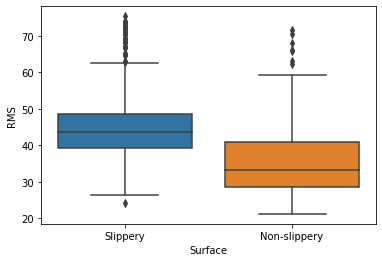

In [24]:
fig = sns.boxplot(data=alldf, x="Surface", y="RMS")

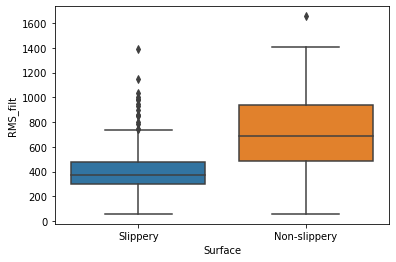

In [25]:
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="RMS_filt")

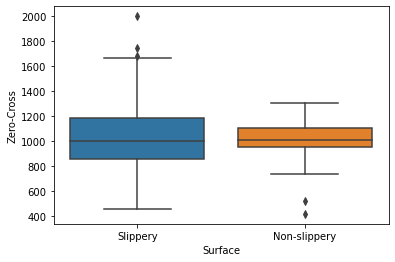

In [26]:
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="Zero-Cross")

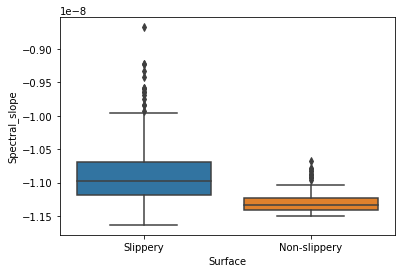

In [27]:
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="Spectral_slope")

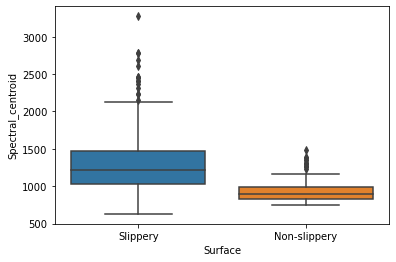

In [28]:
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="Spectral_centroid")

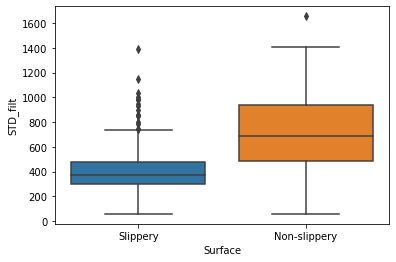

In [29]:
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="STD_filt")

In [30]:
alldf

,Surface,ID,RMS,RMS_filt,Zero-Cross,Zero-Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
0,Slippery,2022_14_52_35-Jan-13.wav,50.376768,287.155613,677.0,817.0,872.058773,1033.649287,-1.136339e-08,-1.118254e-08,1781.135566,1944.799905,369.183606,287.155611
1,Slippery,2022_14_52_35-Jan-13.wav,50.256628,328.166168,739.0,785.0,829.265612,910.573021,-1.141129e-08,-1.132028e-08,1838.614617,1924.201502,366.719988,328.166163
2,Slippery,2022_14_52_35-Jan-13.wav,41.710662,432.748993,834.0,872.0,941.058539,828.900829,-1.128616e-08,-1.141169e-08,2116.499434,1509.755147,472.107963,432.748593
3,Slippery,2022_14_52_35-Jan-13.wav,37.920792,514.146879,954.0,1013.0,808.042893,887.876941,-1.143504e-08,-1.134569e-08,1329.592749,1454.137399,557.310749,514.146750
4,Slippery,2022_14_52_35-Jan-13.wav,32.288397,801.876280,1000.0,1082.0,730.404052,829.479738,-1.152193e-08,-1.141105e-08,1176.416661,1344.256063,911.097690,801.876260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Non-slippery,2022_15_01_26-Jan-13.wav,37.011963,531.305388,1098.0,1149.0,813.741702,907.366109,-1.142866e-08,-1.132387e-08,1258.588978,1508.318899,557.808922,531.305022
140,Non-slippery,2022_15_01_26-Jan-13.wav,39.382083,521.251077,1108.0,1132.0,870.307789,879.623627,-1.136535e-08,-1.135492e-08,1538.552424,1370.250008,556.725253,521.251038
141,Non-slippery,2022_15_01_26-Jan-13.wav,40.723733,524.588712,1082.0,1132.0,943.297724,874.772798,-1.128366e-08,-1.136035e-08,1833.298863,1351.696415,557.612152,524.588697
142,Non-slippery,2022_15_01_26-Jan-13.wav,40.874411,516.557616,1120.0,1176.0,825.324872,965.356107,-1.141570e-08,-1.125897e-08,1274.704115,1697.962647,544.093852,516.557125


# MACHINE LEARNING PART

### This time I split the gravel instances into two: wet and dry.


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [34]:
features

['RMS',
 'RMS_filt',
 'Zero-Cross',
 'Zero-Cross_filt',
 'Spectral_centroid',
 'Spectral_centroid_filt',
 'Spectral_slope',
 'Spectral_slope_filt',
 'Spectral_spread',
 'Spectral_spread_filt',
 'STD',
 'STD_filt']

In [33]:
features = ["RMS", "RMS_filt", "Zero-Cross", "Zero-Cross_filt", "Spectral_centroid", "Spectral_centroid_filt", "Spectral_slope", "Spectral_slope_filt","Spectral_spread", "Spectral_spread_filt", "STD", "STD_filt"] 

In [35]:
features = ["RMS", "RMS_filt", "Zero-Cross", "Zero-Cross_filt", "Spectral_centroid", "Spectral_centroid_filt", "Spectral_slope", "Spectral_slope_filt","Spectral_spread", "Spectral_spread_filt", "STD", "STD_filt"] 

In [55]:

# post processing, standardize the data

#remove na values
alldf = alldf.dropna()

scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object

#with these 3 features only, we can get almost perfect score...

alldf[features] = scaler.fit_transform(alldf[features])

alldf

,Surface,ID,RMS,RMS_filt,Zero-Cross,Zero-Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
0,Slippery,2022_14_52_35-Jan-13.wav,0.715932,-0.738571,-1.586238,-1.286234,-0.859265,-0.547530,-0.859265,-0.547530,-0.584491,-0.134563,-0.649084,-0.738570
1,Slippery,2022_14_52_35-Jan-13.wav,0.704894,-0.584826,-1.303916,-1.411666,-0.972871,-0.843602,-0.972871,-0.843602,-0.498997,-0.162636,-0.657196,-0.584825
2,Slippery,2022_14_52_35-Jan-13.wav,-0.080326,-0.192756,-0.871327,-1.070649,-0.676087,-1.040072,-0.676087,-1.040072,-0.085673,-0.727482,-0.310189,-0.192756
3,Slippery,2022_14_52_35-Jan-13.wav,-0.428546,0.112397,-0.324898,-0.517965,-1.029212,-0.898200,-1.029212,-0.898200,-1.256112,-0.803283,-0.029645,0.112398
4,Slippery,2022_14_52_35-Jan-13.wav,-0.946061,1.191066,-0.115434,-0.247503,-1.235325,-1.038680,-1.235325,-1.038680,-1.483944,-0.953039,1.135256,1.191068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Non-slippery,2022_15_01_26-Jan-13.wav,-0.512051,0.176722,0.330817,0.015120,-1.014083,-0.851317,-1.014083,-0.851317,-1.361722,-0.729439,-0.028004,0.176722
140,Non-slippery,2022_15_01_26-Jan-13.wav,-0.294280,0.139030,0.376352,-0.051515,-0.863914,-0.918054,-0.863914,-0.918054,-0.945307,-0.917612,-0.031573,0.139031
141,Non-slippery,2022_15_01_26-Jan-13.wav,-0.171007,0.151542,0.257959,-0.051515,-0.670143,-0.929723,-0.670143,-0.929723,-0.506904,-0.942899,-0.028652,0.151544
142,Non-slippery,2022_15_01_26-Jan-13.wav,-0.157162,0.121434,0.430995,0.120953,-0.983333,-0.711816,-0.983333,-0.711816,-1.337753,-0.470975,-0.073163,0.121434


In [37]:
X = alldf[features]
y = alldf["Surface"]

X

,RMS,RMS_filt,Zero-Cross,Zero-Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
0,0.715932,-0.738571,-1.586238,-1.286234,-0.859265,-0.547530,-0.859265,-0.547530,-0.584491,-0.134563,-0.649084,-0.738570
1,0.704894,-0.584826,-1.303916,-1.411666,-0.972871,-0.843602,-0.972871,-0.843602,-0.498997,-0.162636,-0.657196,-0.584825
2,-0.080326,-0.192756,-0.871327,-1.070649,-0.676087,-1.040072,-0.676087,-1.040072,-0.085673,-0.727482,-0.310189,-0.192756
3,-0.428546,0.112397,-0.324898,-0.517965,-1.029212,-0.898200,-1.029212,-0.898200,-1.256112,-0.803283,-0.029645,0.112398
4,-0.946061,1.191066,-0.115434,-0.247503,-1.235325,-1.038680,-1.235325,-1.038680,-1.483944,-0.953039,1.135256,1.191068
...,...,...,...,...,...,...,...,...,...,...,...,...
139,-0.512051,0.176722,0.330817,0.015120,-1.014083,-0.851317,-1.014083,-0.851317,-1.361722,-0.729439,-0.028004,0.176722
140,-0.294280,0.139030,0.376352,-0.051515,-0.863914,-0.918054,-0.863914,-0.918054,-0.945307,-0.917612,-0.031573,0.139031
141,-0.171007,0.151542,0.257959,-0.051515,-0.670143,-0.929723,-0.670143,-0.929723,-0.506904,-0.942899,-0.028652,0.151544
142,-0.157162,0.121434,0.430995,0.120953,-0.983333,-0.711816,-0.983333,-0.711816,-1.337753,-0.470975,-0.073163,0.121434


In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True, stratify=None)

x_train

,RMS,RMS_filt,Zero-Cross,Zero-Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
1,-0.537938,0.252566,-0.133648,0.238546,-0.539578,-0.526553,-0.539578,-0.526553,-0.616153,-0.745351,0.367297,0.252566
20,-1.389508,1.749060,-0.101773,-0.024077,-0.820550,-0.697006,-0.820550,-0.697006,-1.045464,-0.790858,1.786882,1.749058
99,1.238646,-0.965360,-0.352219,-0.796267,-0.743834,-0.680319,-0.743834,-0.680319,-0.473731,-0.187172,-1.073009,-0.965360
101,0.290533,-0.462245,0.207870,-0.369015,-0.753039,-0.733140,-0.753039,-0.733140,-0.861804,-0.582019,-0.633435,-0.462244
192,0.214838,-0.602431,1.287067,1.304715,1.681324,1.809690,1.681324,1.809690,1.420569,1.622900,-0.593686,-0.602431
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.960922,-1.250009,-1.481505,0.701075,0.773220,0.519938,0.773220,0.519938,1.027050,0.289801,-0.912148,-1.250009
270,0.203006,-0.678320,-1.290255,-0.639477,-0.516437,-0.377268,-0.516437,-0.377268,-0.219650,-0.197891,-0.531039,-0.678321
15,-1.556707,2.179270,-0.311237,-0.227904,-1.114972,-0.884965,-1.114972,-0.884965,-1.494919,-0.925878,2.254546,2.179271
102,0.085809,-0.329711,0.576710,-0.106392,-0.617389,-0.722731,-0.617389,-0.722731,-0.699966,-0.679755,-0.520224,-0.329710


In [39]:
# KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)



# Extra trees classifier

forestclf = ExtraTreesClassifier(n_estimators = 500)

forestclf.fit(x_train, y_train)

y_pred_forest = forestclf.predict(x_test)


# SVC

#Create a svm Classifier
clf = sklearn.svm.SVC(kernel='linear') 

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_svc = clf.predict(x_test)


# Random Forest

rforestclf = RandomForestClassifier(n_estimators = 500)

rforestclf.fit(x_train, y_train)

y_pred_rforest = rforestclf.predict(x_test)


# Decision tree

treeclf = tree.DecisionTreeClassifier()
treeclf = clf.fit(x_train, y_train)
y_pred_tree = rforestclf.predict(x_test)

# Naive bayes

gnb = GaussianNB()
nbclf = gnb.fit(x_train, y_train)
y_pred_nb = nbclf.predict(x_test)

KNN confusion matrix


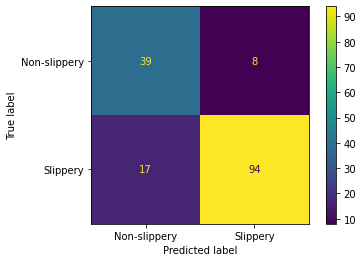

SVC confusion matrix


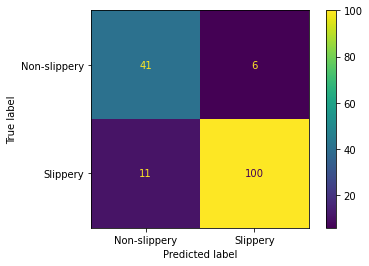

Decision tree classifier confusion matrix


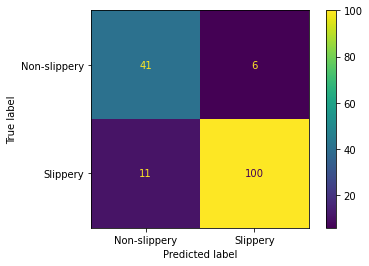

Random forest classifier confusion matrix


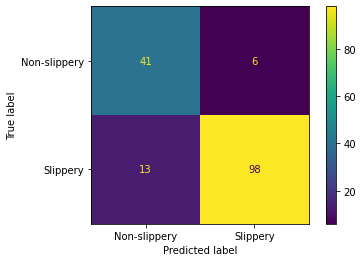

Extra trees classifier confusion matrix


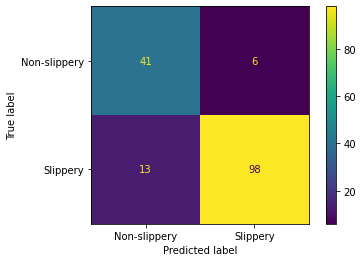

NaiveBayes classifier confusion matrix


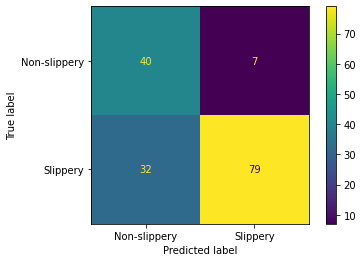

In [40]:
#%matplotlib inline

print("KNN confusion matrix")
plot_confusion_matrix(knn, x_test, y_test)
plt.show()


print("SVC confusion matrix")
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

print("Decision tree classifier confusion matrix")
plot_confusion_matrix(treeclf, x_test, y_test)
plt.show()

print("Random forest classifier confusion matrix")
plot_confusion_matrix(rforestclf, x_test, y_test)
plt.show()

print("Extra trees classifier confusion matrix")
plot_confusion_matrix(forestclf, x_test, y_test)
plt.show()

print("NaiveBayes classifier confusion matrix")
plot_confusion_matrix(nbclf, x_test, y_test)
plt.show()

In [41]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy knn: ", np.round(accuracy_score(y_test, y_pred_knn),2))
print("Accuracy svc: ", np.round(accuracy_score(y_test, y_pred_svc),2))
print("Accuracy Tree : ", np.round(accuracy_score(y_test, y_pred_tree),2))
print("Accuracy Random forest : ", np.round(accuracy_score(y_test, y_pred_rforest),2))
print("Accuracy Extra Trees : ", np.round(accuracy_score(y_test, y_pred_forest),2))

print("----------")

print("Precision knn: ", np.round(precision_score(y_test, y_pred_knn, average='macro'),2))
print("Precision svc: ", np.round(precision_score(y_test, y_pred_svc, average = 'macro'),2))
print("Precision Tree: ", np.round(precision_score(y_test, y_pred_tree, average = 'macro'),2))
print("Precision Random Forest: ", np.round(precision_score(y_test, y_pred_rforest, average = 'macro'),2))
print("Precision trees: ", np.round(precision_score(y_test, y_pred_forest, average = 'macro'),2))

print("----------")

print("Recall knn: ", np.round(recall_score(y_test, y_pred_knn, average = 'macro'),2))
print("Recall svc: ", np.round(recall_score(y_test, y_pred_svc, average = 'macro'),2))     
print("Recall tree: ", np.round(recall_score(y_test, y_pred_tree, average = 'macro'),2))  
print("Recall forest: ", np.round(recall_score(y_test, y_pred_rforest, average = 'macro'),2))     
print("Recall trees: ", np.round(recall_score(y_test, y_pred_forest, average = 'macro'),2)) 

print("----------")
 
print("F1 knn: ", np.round(f1_score(y_test, y_pred_knn, average = 'macro'),2))
print("F1 svc: ", np.round(f1_score(y_test, y_pred_svc, average = 'macro'),2))            
print("F1 tree: ", np.round(f1_score(y_test, y_pred_tree, average = 'macro'),2))  
print("F1 forest: ", np.round(f1_score(y_test, y_pred_rforest, average = 'macro'),2))  

print("F1 trees: ", np.round(f1_score(y_test, y_pred_forest, average = 'macro'),2))  

Accuracy knn:  0.84
Accuracy svc:  0.89
Accuracy Tree :  0.88
Accuracy Random forest :  0.88
Accuracy Extra Trees :  0.88
----------
Precision knn:  0.81
Precision svc:  0.87
Precision Tree:  0.85
Precision Random Forest:  0.85
Precision trees:  0.85
----------
Recall knn:  0.84
Recall svc:  0.89
Recall tree:  0.88
Recall forest:  0.88
Recall trees:  0.88
----------
F1 knn:  0.82
F1 svc:  0.87
F1 tree:  0.86
F1 forest:  0.86
F1 trees:  0.86


In [42]:
model = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)

print('Accuracy knn:', round(np.mean(scores)*100,1), '%')


model = sklearn.svm.SVC(kernel='linear') 
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)

print('Accuracy svc:', round(np.mean(scores)*100,1), '%')


model = tree.DecisionTreeClassifier()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)
print('Accuracy tree:', round(np.mean(scores)*100,1), '%')


# model = RandomForestClassifier(n_estimators = 500)
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)
# print('Accuracy forest:', round(np.mean(scores)*100,1), '%')



# model = ExtraTreesClassifier(n_estimators = 500)
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)

# print('Accuracy extra trees:', round(np.mean(scores)*100,1), '%')

Accuracy knn: 89.7 %
Accuracy svc: 90.8 %
Accuracy tree: 86.4 %


In [126]:
X

,RMS,RMSf,Spec,Specf,ZC,ZCf,Specslo,Specslof,Specspr,Specsprf,STD,STDf
0,0.636991,-0.909537,-1.436763,-1.451934,-1.776822,-1.970302,-0.277799,-0.296562,-0.671288,-0.752975,-0.932151,-0.909537
1,0.179694,-0.795452,-1.602796,-1.544345,-1.609772,-1.678002,-0.489709,-0.406159,-1.160694,-1.059778,-0.775480,-0.795452
2,0.122326,-0.674255,-1.332246,-1.373932,-1.489207,-1.564362,-0.144402,-0.204052,-0.564559,-0.896966,-0.652589,-0.674255
3,-0.159926,-0.517573,-1.604402,-1.497758,-1.640515,-1.721935,-0.491759,-0.350907,-1.145385,-0.828780,-0.448782,-0.517573
4,-0.238222,-0.523400,-1.660792,-1.546567,-1.795157,-1.823078,-0.563729,-0.408794,-1.130075,-0.932176,-0.415016,-0.523400
...,...,...,...,...,...,...,...,...,...,...,...,...
664,1.137249,-0.968632,0.498121,0.390345,1.020432,0.982384,0.129511,-0.006529,0.326647,0.353976,-1.040439,-0.968632
665,0.614169,-0.435030,0.524241,0.449193,1.026914,0.950166,0.165181,0.068150,0.261300,0.276181,-0.497996,-0.435030
666,-0.593662,0.207291,-0.228514,-0.280964,0.435572,0.454602,-0.862822,-0.858418,-0.584690,-0.680135,0.225667,0.207291
667,-0.641654,0.622580,-0.042689,-0.086110,0.765412,0.746903,-0.609049,-0.611148,-0.694372,-0.673102,0.621277,0.622580


In [127]:
features

['RMS',
 'RMSf',
 'Spec',
 'Specf',
 'ZC',
 'ZCf',
 'Specslo',
 'Specslof',
 'Specspr',
 'Specsprf',
 'STD',
 'STDf']

In [128]:
alldf

,Surface,RMS,RMSf,ZC,ZCf,Spec,Specf,Specslo,Specslof,Specspr,Specsprf,STD,STDf
0,Wet Asphalt,0.636991,-0.909537,-1.776822,-1.970302,-1.436763,-1.451934,-0.277799,-0.296562,-0.671288,-0.752975,-0.932151,-0.909537
1,Wet Asphalt,0.179694,-0.795452,-1.609772,-1.678002,-1.602796,-1.544345,-0.489709,-0.406159,-1.160694,-1.059778,-0.775480,-0.795452
2,Wet Asphalt,0.122326,-0.674255,-1.489207,-1.564362,-1.332246,-1.373932,-0.144402,-0.204052,-0.564559,-0.896966,-0.652589,-0.674255
3,Wet Asphalt,-0.159926,-0.517573,-1.640515,-1.721935,-1.604402,-1.497758,-0.491759,-0.350907,-1.145385,-0.828780,-0.448782,-0.517573
4,Wet Asphalt,-0.238222,-0.523400,-1.795157,-1.823078,-1.660792,-1.546567,-0.563729,-0.408794,-1.130075,-0.932176,-0.415016,-0.523400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,Dry Asphalt,1.137249,-0.968632,1.020432,0.982384,0.498121,0.390345,0.129511,-0.006529,0.326647,0.353976,-1.040439,-0.968632
665,Dry Asphalt,0.614169,-0.435030,1.026914,0.950166,0.524241,0.449193,0.165181,0.068150,0.261300,0.276181,-0.497996,-0.435030
666,Dry Asphalt,-0.593662,0.207291,0.435572,0.454602,-0.228514,-0.280964,-0.862822,-0.858418,-0.584690,-0.680135,0.225667,0.207291
667,Dry Asphalt,-0.641654,0.622580,0.765412,0.746903,-0.042689,-0.086110,-0.609049,-0.611148,-0.694372,-0.673102,0.621277,0.622580


## Unsupervised ML

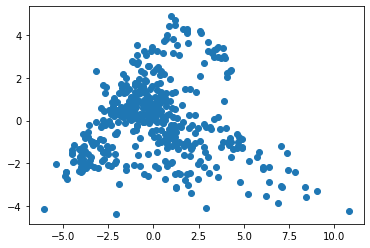

In [43]:
# Import whatever libraries, modules, etc. you may need here.

import scipy as sp
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

X =  alldf[features]
Y = alldf["Surface"]

X = X.apply(sp.stats.zscore) # z-standardization


#PCA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
plt.figure()
plt.scatter(X_r[:,0],X_r[:,1])
plt.show()

In [44]:
Y

0          Slippery
1          Slippery
2          Slippery
3          Slippery
4          Slippery
           ...     
139    Non-slippery
140    Non-slippery
141    Non-slippery
142    Non-slippery
143    Non-slippery
Name: Surface, Length: 477, dtype: object

In [45]:
Y = pd.factorize(Y)[0]

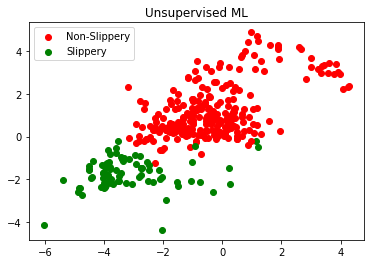

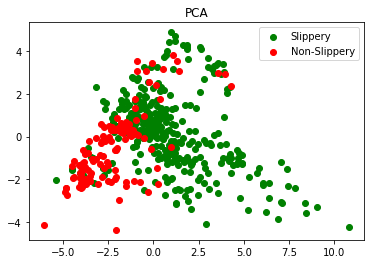

Rand score: 0.13433661691171309


In [46]:


# clustering with ward method
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
clustering_labels = clustering.labels_

# PCA
pca=PCA(n_components=3)
X_r = pca.fit_transform(X)


plt.figure()
# plot the predicted clusters 
for i in range(len(clustering_labels)):
    labels = list(set(clustering_labels))
    if clustering_labels[i] == labels[2]:
        plt.scatter(X_r[i,0],X_r[i,1], color='g', label="Slippery")
        
    if clustering_labels[i] == labels[0]:
        plt.scatter(X_r[i,0],X_r[i,1], color='r', label="Non-Slippery")


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Unsupervised ML")
plt.show()

plt.figure()
# plot the correct types
for i in range(len(Y)):
    labels = list(set(Y))
    if Y[i] == labels[0]:
        plt.scatter(X_r[i,0],X_r[i,1], color='g', label="Slippery")
    if Y[i] == labels[1]:
        plt.scatter(X_r[i,0],X_r[i,1], color='r', label="Non-Slippery")

        
plt.title("PCA")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

rand = adjusted_rand_score(Y, clustering_labels)
print('Rand score:', rand)


In [49]:
%matplotlib notebook
plt.style.use('ggplot')

<IPython.core.display.Javascript object>


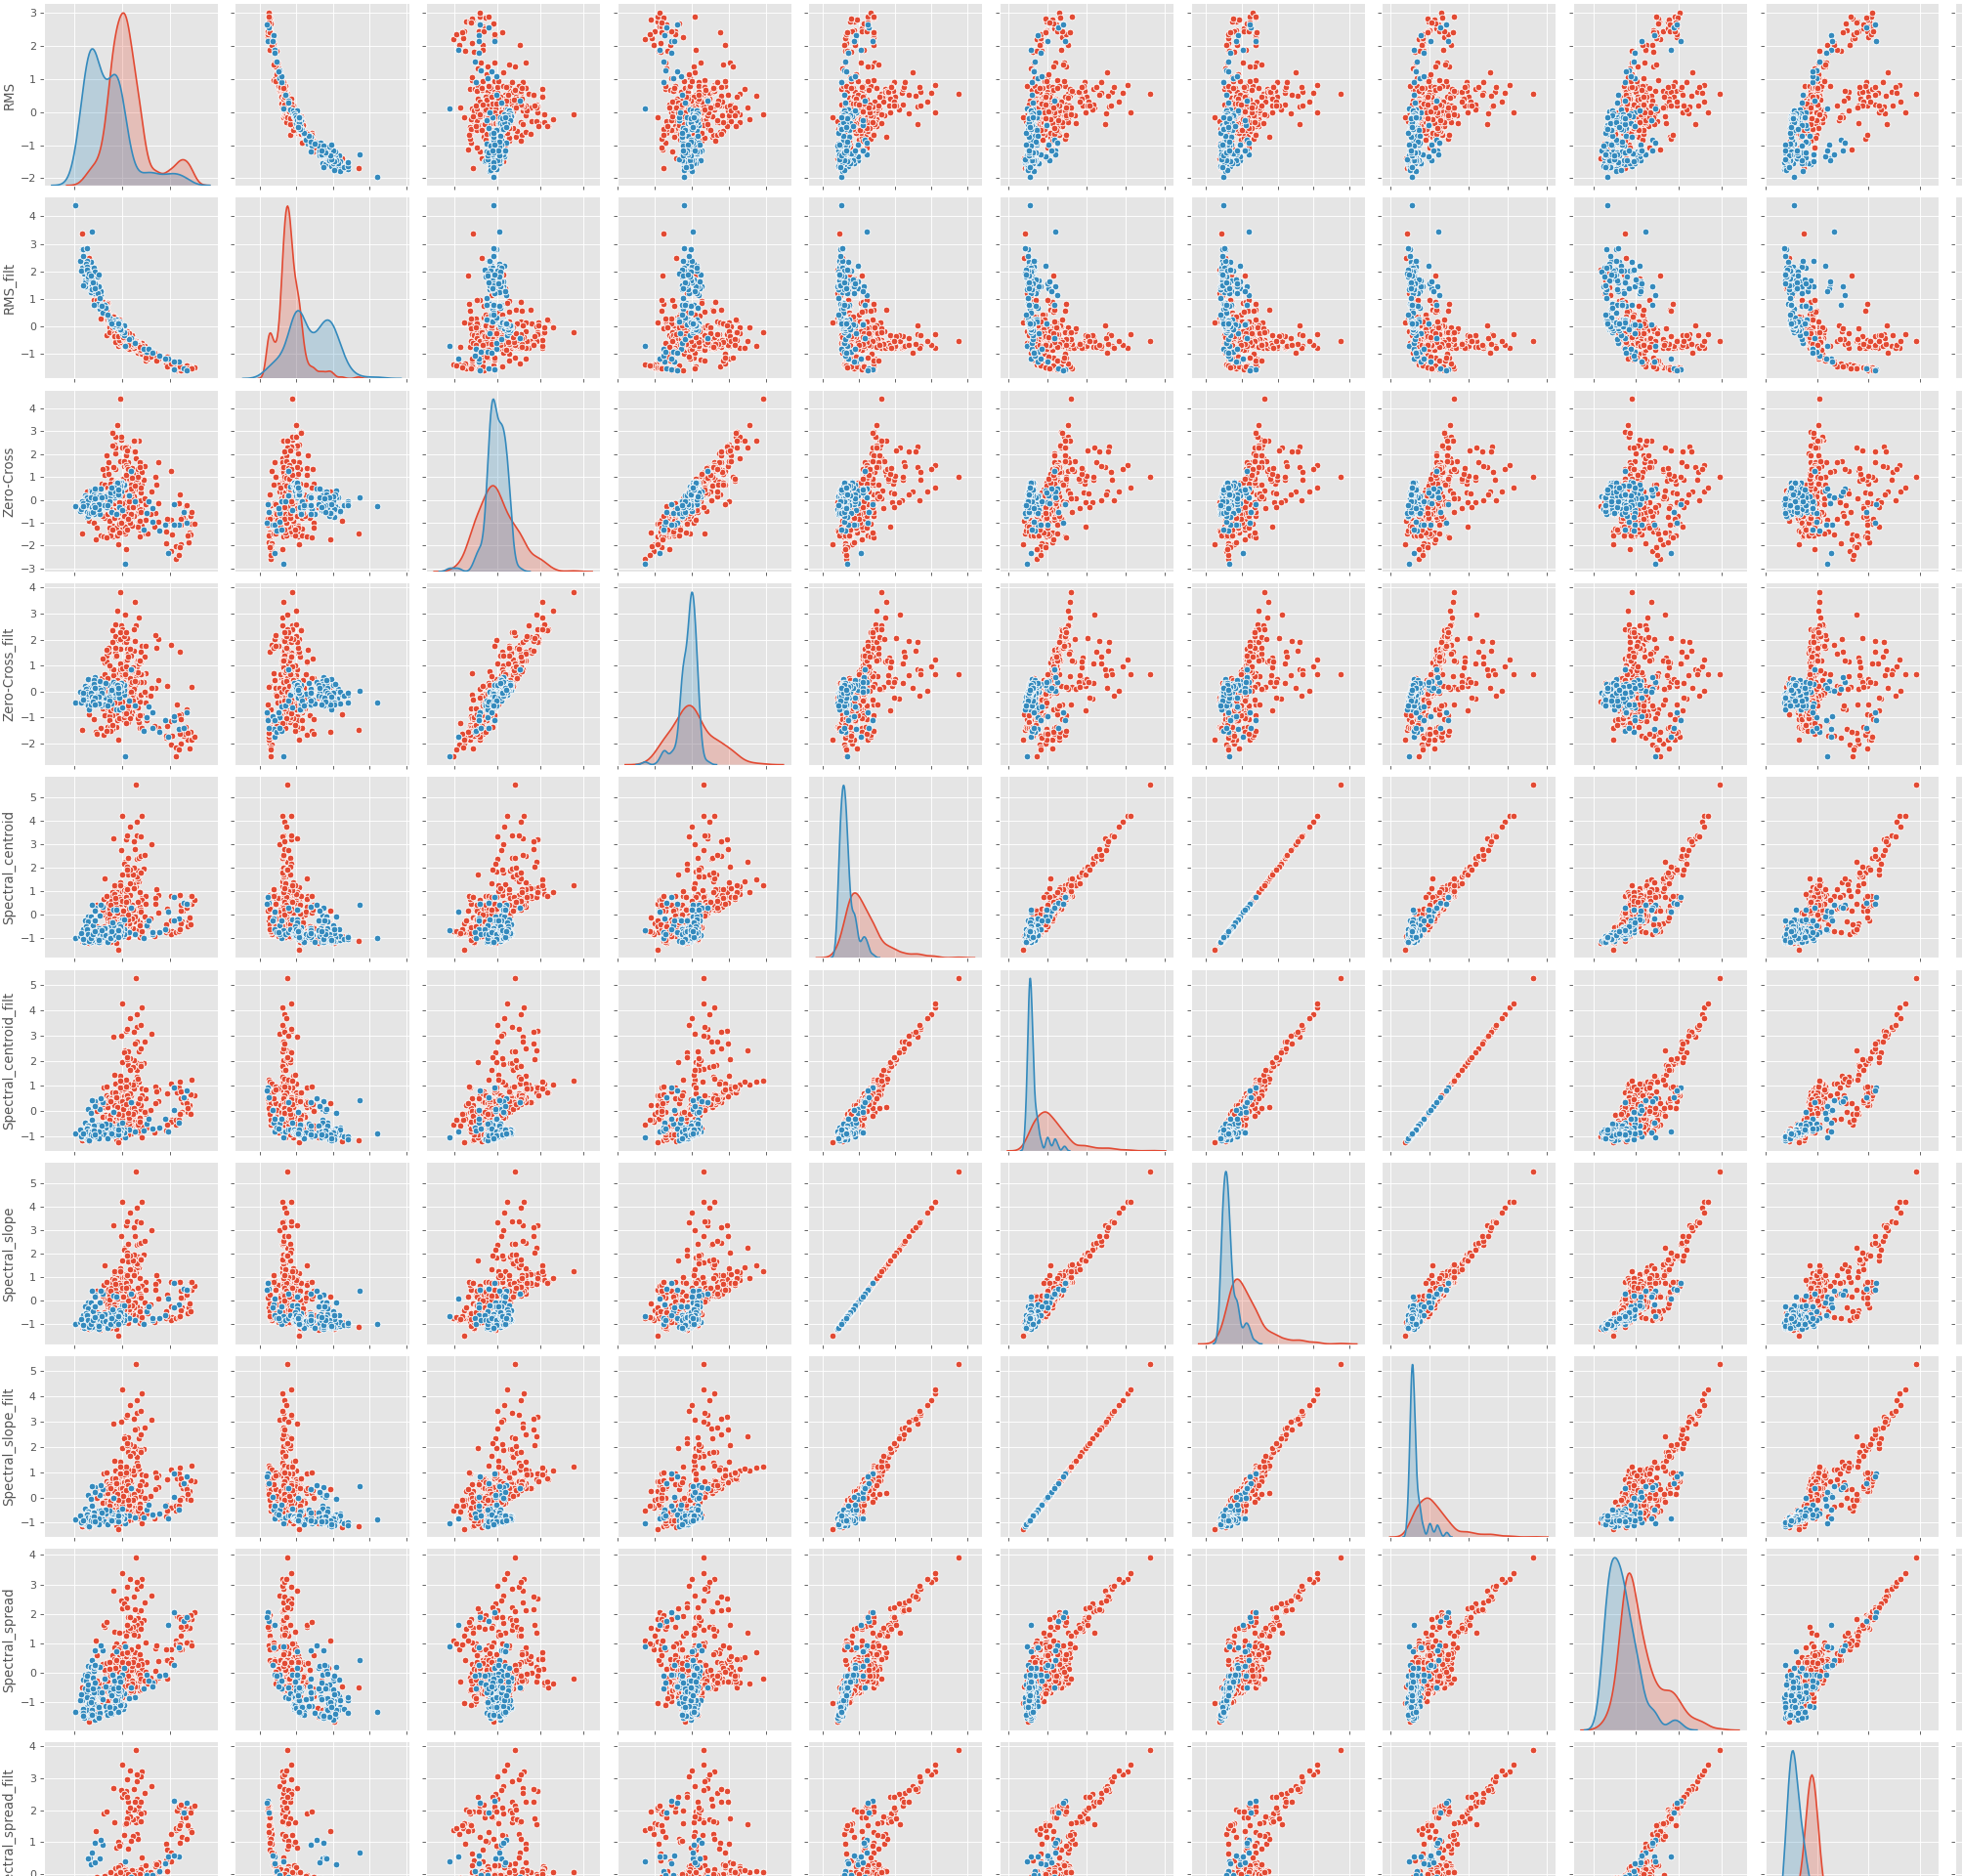

In [50]:

sns.pairplot(alldf, hue='Surface')